Inteligencia Artificial y Aprendizaje Automático
Actividad Semanas 3 y 4:
Modelado, Balanceo e Importancia de Factores


Maestría en Inteligencia Artificial Aplicada
Tecnológico de Monterrey
Prof. Luis Eduardo Falcón Morales

**Nombre:** Enma Galindo
**Matrícula:** A01795095

Esta Tarea se deberá resolver de manera individual y es parte de lo que estarás estudiando en las
semanas 3 y 4 del curso. Deberás generar un archivo de Jupyter-Notebook con los análisis y
comentarios que se te piden en los ejercicios.
La rotación de personal es uno de los problemas que afecta actualmente a muchas empresas y
organizaciones, grandes o pequeñas y de cualquier tipo de negocio. En esta actividad usaremos
una base de datos generada por IBM para estudiar cómo enfrentar dicho problema. Deberás
descargar el archivo de la siguiente liga de Kaggle, la cual consta de 1470 registros y 35
columnas:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

***PARTE 1: Análisis descriptivo y preprocesamiento de los datos: ***



*   Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).

Es la reducción de su fuerza laboral. Sucede cuando los empleados se jubilan, renuncian o son despedidos, pero no son reemplazados. Se le llama "ciclo de vida del empleado" porque de alguna manera llega a su fin. Ningún empleado dura para siempre.

Referencia: Employee Attrition and How to Minimize it. (n.d.). Qualtrics. Retrieved February 5, 2024, from https://www.qualtrics.com/experience-management/employee/employee-attrition/



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/MNA - Ciencia y Análisis de Datos /"
os.chdir(DIR)
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition 2.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


¿Cuántas y cuáles de las variables son numéricas?

26 variables numéricas: Age, DailyRate, DistanceFromHome, Education, EmployeeCount,
EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome,MonthlyRate, NumCompaniesWorked, PercentSalaryHike,PerformanceRating, RelationshipSatisfaction, StandardHours,StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager

*   ¿Cuántas y cuáles de estas variables numéricas son de valor entero? **26 variables**
*   ¿Cuántas y cuáles de estas variables numéricas son de valor real (flotante)? **0 variables**
*   De existir el caso, ¿cuántas y cuáles de estas variables numéricas se pueden
anular del problema? Justifica tu respuesta. **Ninguna, niguna de las columnas tienen un alto porcentaje de valores nulos por lo que, no pueden considerarse para eliminación, sí aportan información crítica al análisis.**

In [ ]:
info_df = df.info()

# Filtrar las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int', 'float']).columns

# Filtrar las columnas numéricas que son de valor entero
columnas_enteras = df[columnas_numericas].select_dtypes(include='int').columns

# Filtrar las columnas numéricas que son de valor real (flotante)
columnas_reales = df[columnas_numericas].select_dtypes(include='float').columns

# Imprimir resultados
print("Información sobre el tipo de datos de cada columna:")
print(info_df)

print("\nColumnas numéricas:")
print(columnas_numericas)

print("\nColumnas numéricas de valor entero:")
print(columnas_enteras)

print("\nNúmero total de columnas numéricas de valor entero:")
print(len(columnas_enteras))

print("\nColumnas numéricas de valor real (flotante):")
print(columnas_reales)

print("\nNúmero total de columnas numéricas de valor real (flotante):")
print(len(columnas_reales))

# Identificar columnas que pueden ser anuladas (contienen valores nulos)
columnas_con_nulos = df[columnas_numericas].columns[df[columnas_numericas].isnull().any()]

# Imprimir columnas que pueden ser anuladas y justificación
print("\nColumnas que pueden ser anuladas (contienen valores nulos):")
print(columnas_con_nulos)

# Contar el número de columnas que pueden ser anuladas
num_columnas_anulables = len(columnas_con_nulos)

print("\nNúmero total de columnas que pueden ser anuladas:")
print(num_columnas_anulables)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

¿Cuántas y cuáles de las variables son categóricas?
*   ¿Cuántas y cuáles de estas variables son binarias?
*   ¿Cuántas y cuáles de estas variables son nominales? Indica el total de
niveles que tiene cada una de estas variables.
*   ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles
que tiene cada una de estas variables.
iv. De existir el caso, ¿cuántas y cuáles de estas variables categóricas se pueden
anular del problema? Justifica tu respuesta.

In [ ]:
# Identificar variables categóricas
categorical_variables = df.select_dtypes(include=['object'])

# Identificar variables binarias
binary_variables = df[categorical_variables.columns].nunique()[df[categorical_variables.columns].nunique() == 2].index

# Identificar variables nominales y contar los niveles
nominal_variables = df[categorical_variables.columns].nunique()[df[categorical_variables.columns].nunique() > 2].index
nominal_levels = df[nominal_variables].nunique()

# Identificar variables ordinales y contar los niveles
ordinal_variables = df[categorical_variables.columns].nunique()[df[categorical_variables.columns].nunique() > 2].index
ordinal_levels = df[ordinal_variables].nunique()

# Imprimir resultados
print(f"Total de variables categóricas: {len(categorical_variables.columns)}")
print(f"Listado de variables categóricas: {categorical_variables.columns.tolist()}")

print(f"\nTotal de variables binarias: {len(binary_variables)}")
print(f"Listado de variables binarias: {binary_variables.tolist()}")

print(f"\nTotal de variables nominales: {len(nominal_variables)}")
print(f"Listado de variables nominales: {nominal_variables.tolist()}")
print(f"Niveles en variables nominales:\n{nominal_levels}")

print(f"\nTotal de variables ordinales: {len(ordinal_variables)}")
print(f"Listado de variables ordinales: {ordinal_variables.tolist()}")
print(f"Niveles en variables ordinales:\n{ordinal_levels}")


Total de variables categóricas: 9
Listado de variables categóricas: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Total de variables binarias: 3
Listado de variables binarias: ['Attrition', 'Gender', 'OverTime']

Total de variables nominales: 5
Listado de variables nominales: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
Niveles en variables nominales:
BusinessTravel    3
Department        3
EducationField    6
JobRole           9
MaritalStatus     3
dtype: int64

Total de variables ordinales: 5
Listado de variables ordinales: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
Niveles en variables ordinales:
BusinessTravel    3
Department        3
EducationField    6
JobRole           9
MaritalStatus     3
dtype: int64


En esta base de datos y con base a la información dada, ¿existe alguna o algunas variables cuya clasificación en algún tipo de dato dependa del analista? ¿Cuáles y por qué?

A pesar que uso los códigos de abajo para eliminar las columnas con un bajo número de valores únicos, considero que no pueden eliminarse porque son personales de los empleados.


In [ ]:
info_df = df.info()

# Identificar columnas con un número bajo de valores únicos
columnas_con_pocos_valores = df.columns[df.nunique() <= 5]

print("Información sobre el tipo de datos de cada columna:")
print(info_df)

print("\nColumnas con un número bajo de valores únicos:")
print(columnas_con_pocos_valores)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
columnas_con_pocos_valores = df.columns[df.nunique() <= 5]

# Eliminar las columnas con bajo número de valores únicos
df_sin_columnas = df.drop(columns=columnas_con_pocos_valores)

# Imprimir información sobre el DataFrame resultante
print("Información sobre el DataFrame después de eliminar columnas:")
print(df_sin_columnas.info())


Información sobre el DataFrame después de eliminar columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   DailyRate                1470 non-null   int64 
 2   DistanceFromHome         1470 non-null   int64 
 3   EducationField           1470 non-null   object
 4   EmployeeNumber           1470 non-null   int64 
 5   HourlyRate               1470 non-null   int64 
 6   JobRole                  1470 non-null   object
 7   MonthlyIncome            1470 non-null   int64 
 8   MonthlyRate              1470 non-null   int64 
 9   NumCompaniesWorked       1470 non-null   int64 
 10  PercentSalaryHike        1470 non-null   int64 
 11  TotalWorkingYears        1470 non-null   int64 
 12  TrainingTimesLastYear    1470 non-null   int64 
 13  YearsAtCompany           1470 no

3) Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”.
a) Despliega la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Realizar la partición estratificada
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Imprimir las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de validación (X_val, y_val):", X_val.shape, y_val.shape)
print("Dimensiones del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)


Dimensiones del conjunto de entrenamiento (X_train, y_train): (1029, 34) (1029,)
Dimensiones del conjunto de validación (X_val, y_val): (220, 34) (220,)
Dimensiones del conjunto de prueba (X_test, y_test): (221, 34) (221,)


4) Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables
numéricas.
a) Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en
dichas variables?
*   Aplica las transformaciones que hayas determinado realizar, evitando el filtrado de información (data-leakage). A estas nuevas variables transformadas llamarlas XtrainT, XvalT y XtestT.

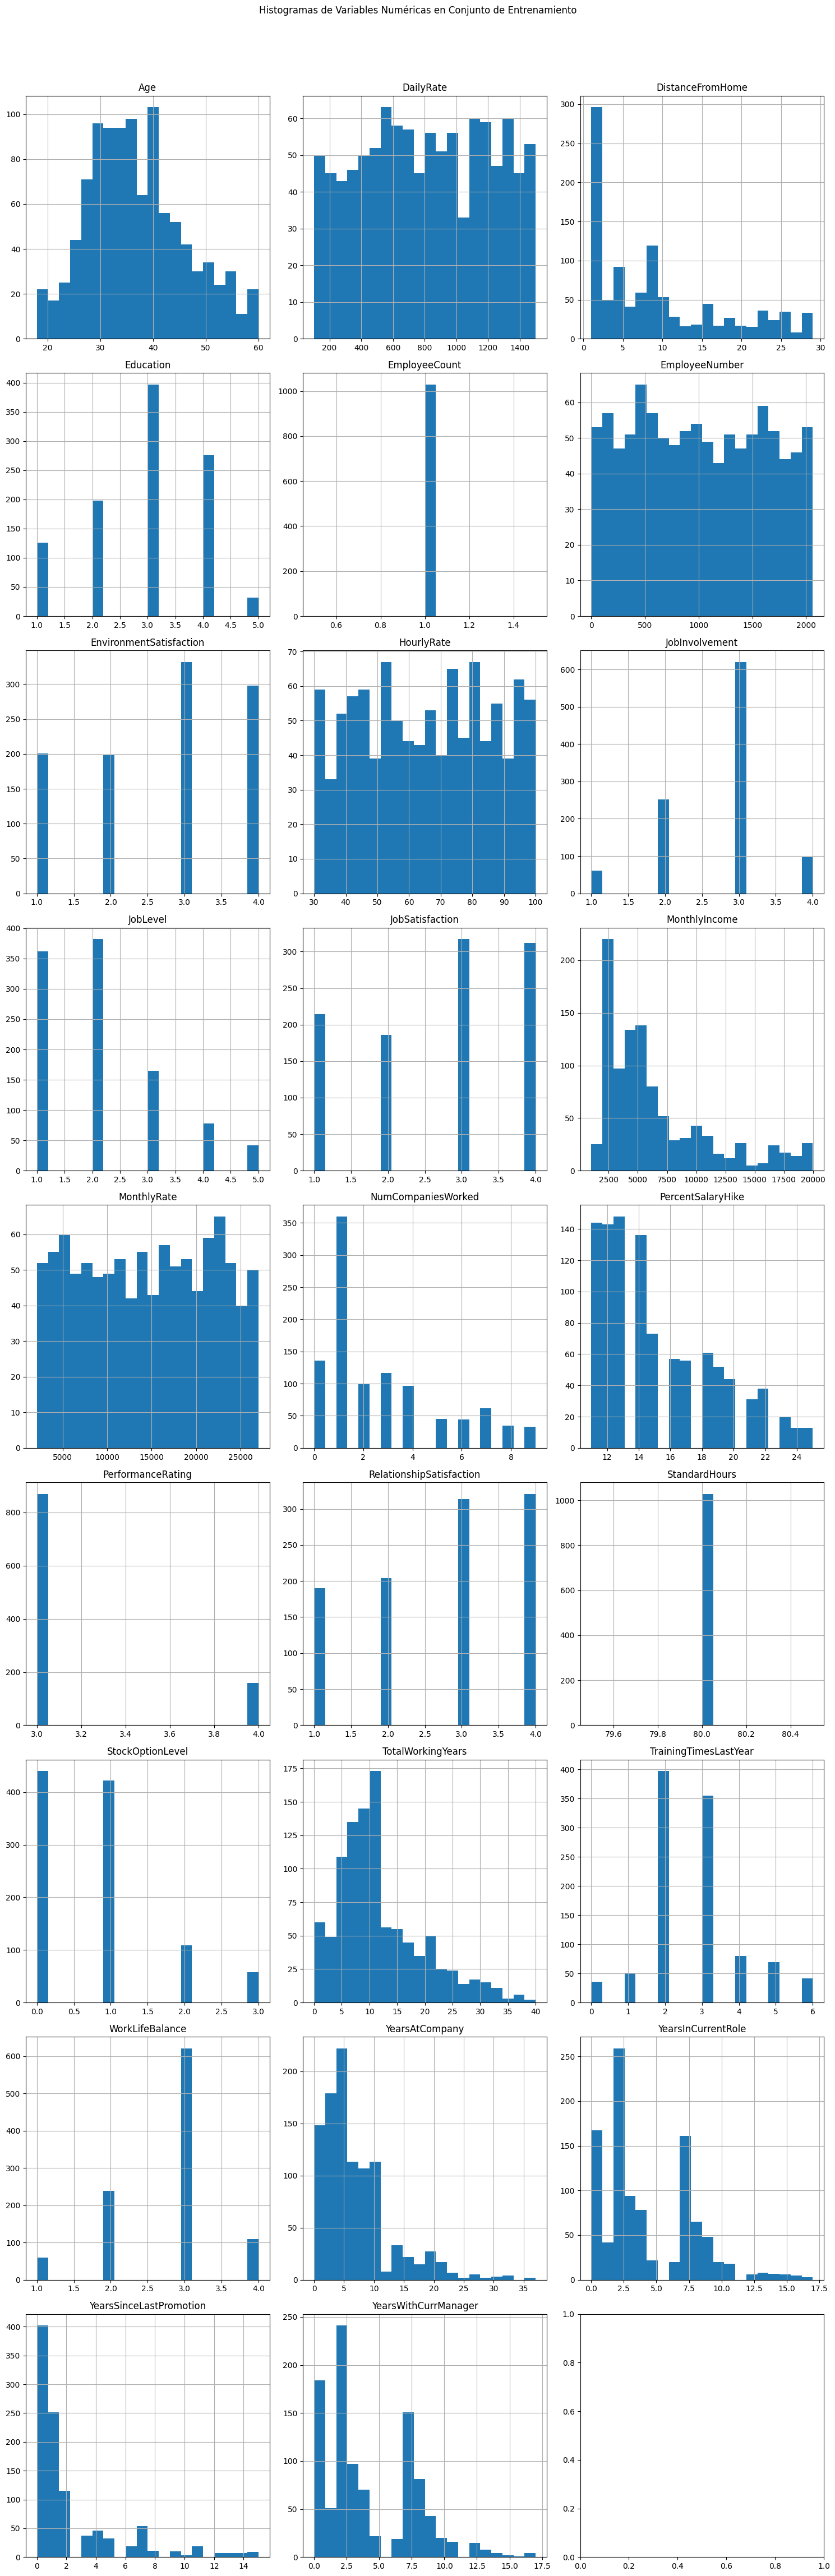

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['number']).columns

# Número de columnas en el diseño de subgráficos
num_columnas = 3

# Calcular el número de filas necesario
num_filas = int(np.ceil(len(columnas_numericas) / num_columnas))

# Crear histogramas para cada variable numérica
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))
fig.suptitle("Histogramas de Variables Numéricas en Conjunto de Entrenamiento", y=1.02)

# Iterar sobre las columnas y crear histogramas en subgráficos
for i, columna in enumerate(columnas_numericas):
    ax = axes[i // num_columnas, i % num_columnas]
    X_train[columna].hist(bins=20, ax=ax)
    ax.set_title(columna)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.show()

# Aplicar logaritmo a las variables numéricas
X_trainT = X_train.copy()
X_trainT[columnas_numericas] = np.log1p(X_trainT[columnas_numericas])

# Aplicar las mismas transformaciones a los conjuntos de validación y prueba
X_valT = X_val.copy()
X_valT[columnas_numericas] = np.log1p(X_valT[columnas_numericas])

X_testT = X_test.copy()
X_testT[columnas_numericas] = np.log1p(X_testT[columnas_numericas])

import numpy as np

# Supongamos que X_train, X_val, y X_test son tus conjuntos originales

# Función para aplicar transformaciones a variables numéricas
def aplicar_transformaciones(df):
    columnas_numericas = df.select_dtypes(include=['number']).columns
    df_transformado = df.copy()
    df_transformado[columnas_numericas] = np.log1p(df_transformado[columnas_numericas])
    # Puedes agregar más transformaciones según sea necesario
    return df_transformado

# Aplicar transformaciones a los conjuntos
X_trainT = aplicar_transformaciones(X_train)
X_valT = aplicar_transformaciones(X_val)
X_testT = aplicar_transformaciones(X_test)

5) Aplica la transformación LabelEncoder() de sklearn a todas las variables binarias, evitando el filtrado de información.
a) En particular, obtener la distribución de las clases de la variable de salida “Attrition”. Con base a dicha distribución, ¿podemos considerar que tenemos un problema de datos no balanceados?

In [ ]:
from sklearn.preprocessing import LabelEncoder

columnas_binarias = X_train.select_dtypes(include=['bool']).columns

# Aplicar LabelEncoder a las columnas binarias en los conjuntos de datos
le = LabelEncoder()
for columna in columnas_binarias:
    X_train[columna] = le.fit_transform(X_train[columna])
    X_val[columna] = le.transform(X_val[columna])
    X_test[columna] = le.transform(X_test[columna])

# Obtener la distribución de las clases de la variable de salida "Attrition"
distribucion_clases = y_train.value_counts(normalize=True)

# Imprimir la distribución de las clases
print("Distribución de las clases de la variable 'Attrition':")
print(distribucion_clases)

# Verificar si hay un problema de datos no balanceados
if distribucion_clases.min() < 0.05 or distribucion_clases.max() > 0.95:
    print("Podríamos considerar que hay un problema de datos no balanceados.")
else:
    print("No parece haber un problema significativo de datos no balanceados.")


Distribución de las clases de la variable 'Attrition':
No     0.838678
Yes    0.161322
Name: Attrition, dtype: float64
No parece haber un problema significativo de datos no balanceados.


6) Realiza una inspección de las variables ordinales y determina qué transformaciones aplicarles, en caso de aplicar alguna. Justifica la decisión que tomes.

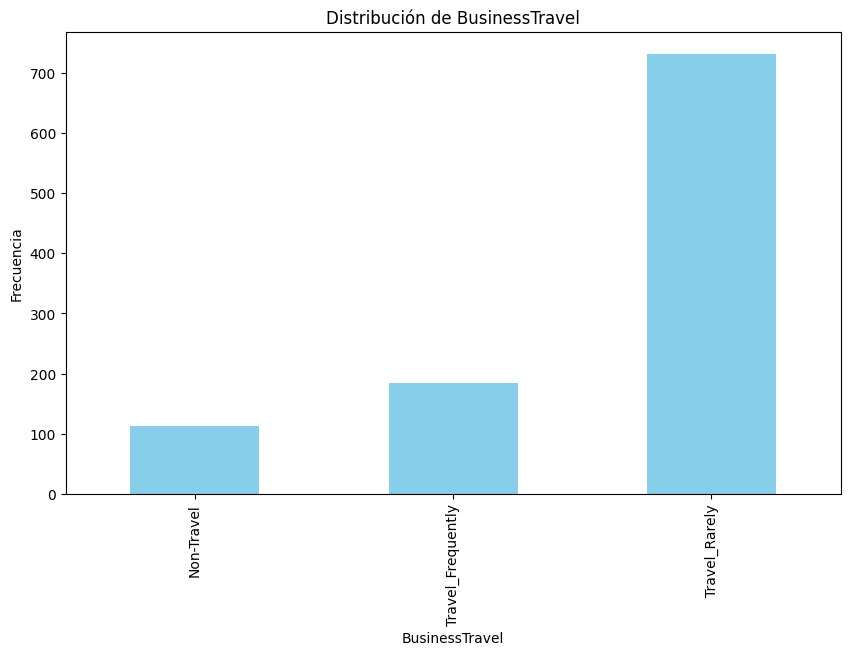

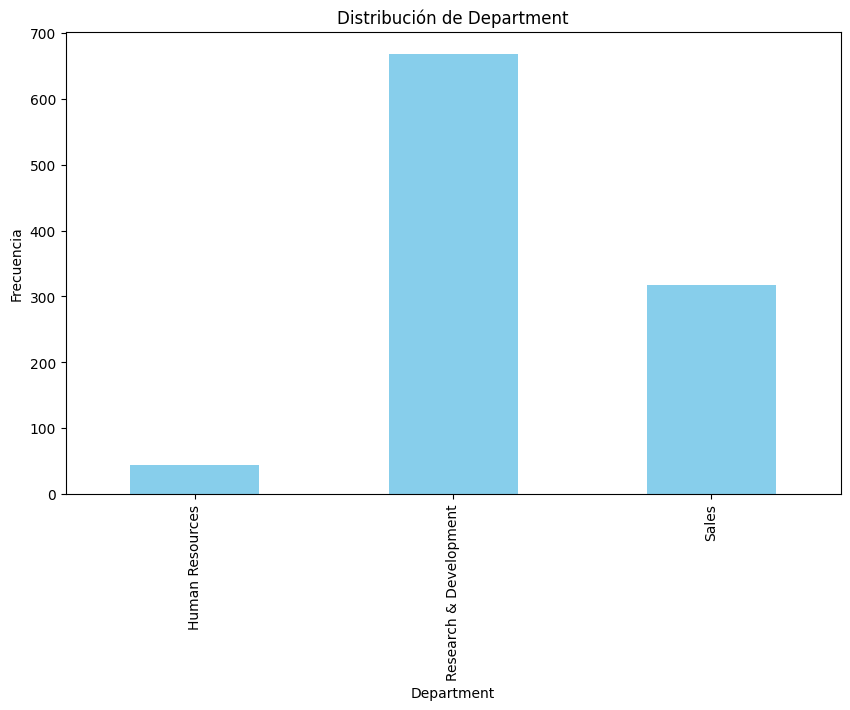

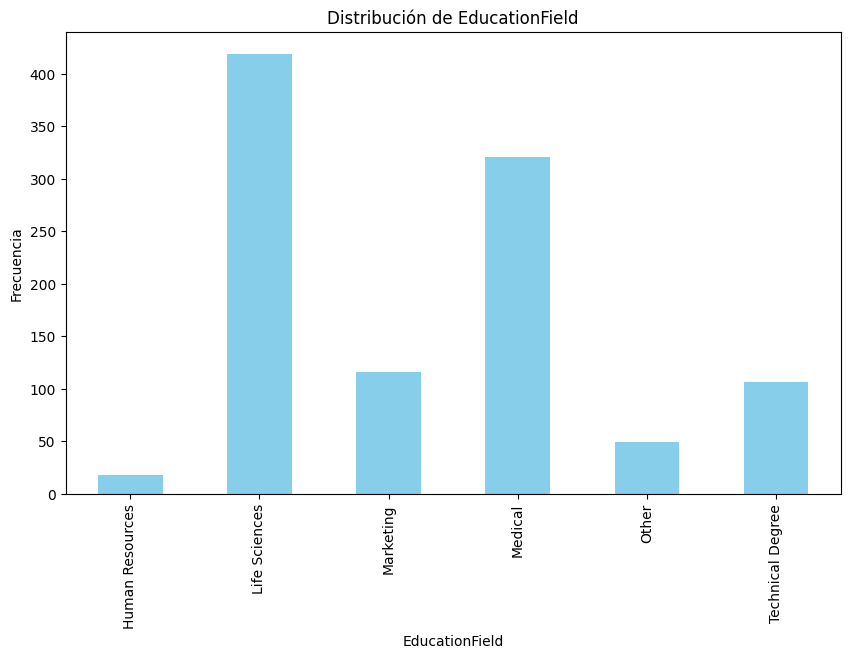

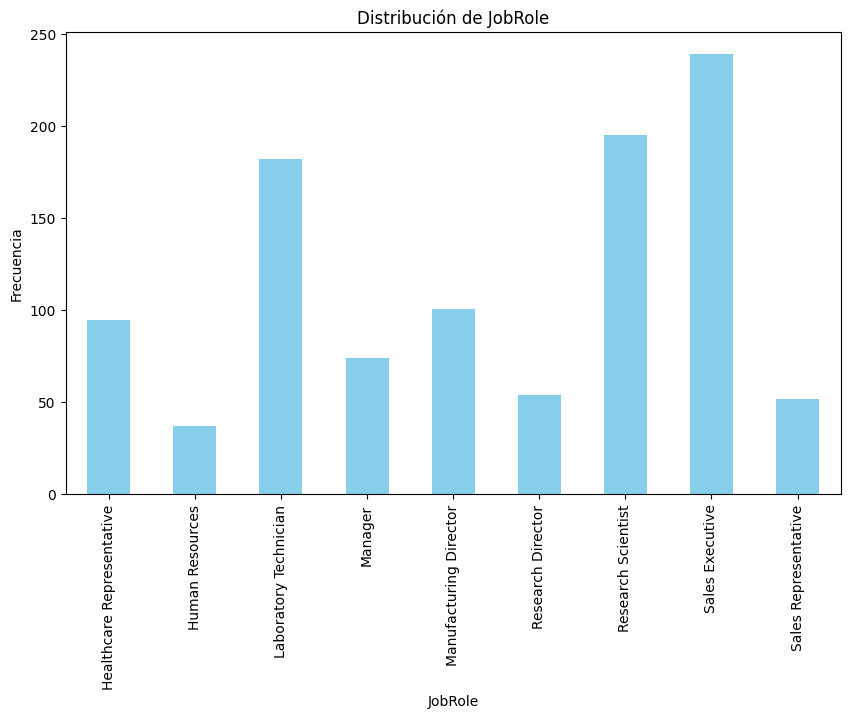

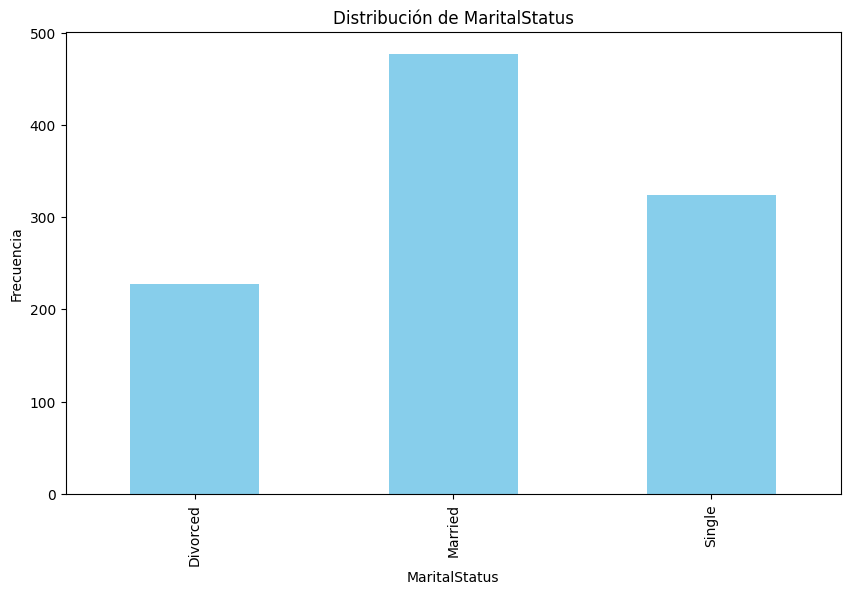

In [ ]:
for variable in ordinal_variables:
    plt.figure(figsize=(10, 6))
    X_train[variable].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

codificacion_ordinal = {'Baja': 1, 'Media': 2, 'Alta': 3}
for variable in ordinal_variables:
    X_train[variable] = X_train[variable].map(codificacion_ordinal)
    X_val[variable] = X_val[variable].map(codificacion_ordinal)
    X_test[variable] = X_test[variable].map(codificacion_ordinal)


7) Obtener la matriz de correlación de los factores obtenidos hasta el momento. Debes incluir la variable “Attrition”.
a) Indica las correlaciones positivas “fuertes” entre pares de factores que encuentres dentro de la matriz.
b) Indica las correlaciones negativas “fuertes” entre pares de factores que encuentres dentro de la matriz.

<ipython-input-164-11ffa8291511>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


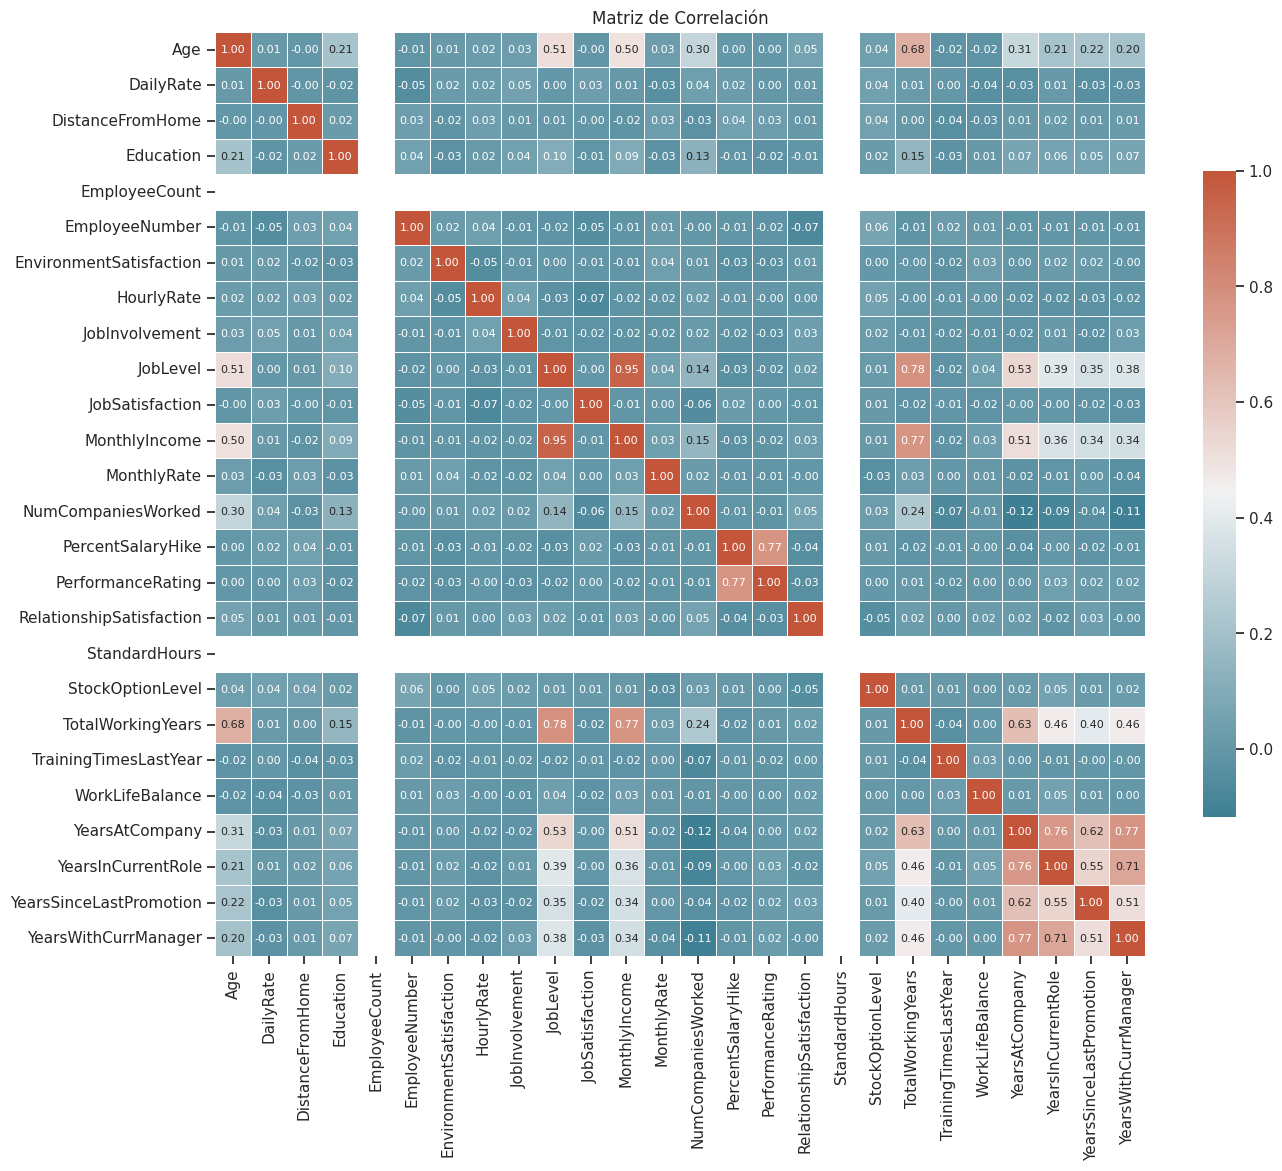


Correlaciones positivas fuertes:
                 level_0               level_1  Correlation
0               JobLevel         MonthlyIncome     0.950300
1               JobLevel     TotalWorkingYears     0.782208
2          MonthlyIncome              JobLevel     0.950300
3          MonthlyIncome     TotalWorkingYears     0.772893
4      PercentSalaryHike     PerformanceRating     0.773550
5      PerformanceRating     PercentSalaryHike     0.773550
6      TotalWorkingYears              JobLevel     0.782208
7      TotalWorkingYears         MonthlyIncome     0.772893
8         YearsAtCompany    YearsInCurrentRole     0.758754
9         YearsAtCompany  YearsWithCurrManager     0.769212
10    YearsInCurrentRole        YearsAtCompany     0.758754
11    YearsInCurrentRole  YearsWithCurrManager     0.714365
12  YearsWithCurrManager        YearsAtCompany     0.769212
13  YearsWithCurrManager    YearsInCurrentRole     0.714365

Correlaciones negativas fuertes:
Empty DataFrame
Columns: [level_

In [ ]:
import seaborn as sns

# Obtener la matriz de correlación
correlation_matrix = df.corr()

custom_palette = sns.diverging_palette(220, 20, as_cmap=True)

# Graficar la matriz de correlación usando un mapa de calor (heatmap)
plt.figure(figsize=(15, 12))  # Ajusta el tamaño de la figura según tus preferencias
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f", linewidths=.5, annot_kws={"size": 8}, cbar_kws={"shrink": 0.7})
plt.title("Matriz de Correlación")
plt.show()

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

# Identificar correlaciones positivas fuertes (mayor a 0.7)
strong_positive_correlations = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix < 1)]
print("\nCorrelaciones positivas fuertes:")
print(strong_positive_correlations.stack().reset_index().rename(columns={0: 'Correlation'}))

# Identificar correlaciones negativas fuertes (menor a -0.7)
strong_negative_correlations = correlation_matrix[(correlation_matrix < -0.7) & (correlation_matrix > -1)]
print("\nCorrelaciones negativas fuertes:")
print(strong_negative_correlations.stack().reset_index().rename(columns={0: 'Correlation'}))

8) Aplica la transformación get_dummies() de Pandas a las variables nominales, evitando el filtrado de información y usando el argumento “drop_first” para generar “k-1” variables “dummies”, de las “k” que cada variable.

In [ ]:
df_nominal_dummies = pd.get_dummies(df[nominal_variables], drop_first=True)

# Concatenar las variables dummy al DataFrame original
df = pd.concat([df, df_nominal_dummies], axis=1)

# Eliminar las variables originales después de aplicar get_dummies()
df = df.drop(nominal_variables, axis=1)

# Visualizar las primeras filas del DataFrame resultante
print(df.head())


   Age Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41       Yes       1102                 1          2              1   
1   49        No        279                 8          1              1   
2   37       Yes       1373                 2          2              1   
3   33        No       1392                 3          4              1   
4   27        No        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2  Female          94  ...   
1               2                        3    Male          61  ...   
2               4                        4    Male          92  ...   
3               5                        4  Female          56  ...   
4               7                        1    Male          40  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                  

9) Usa la instrucción XtrainT.head().T, para desplegar los primeros registros de tus datos de entrenamiento con todas las transformaciones realizadas hasta ahora.
NOTA: Hasta aquí, los nombres de tus variables deben seguir siendo los mismos: XtrainT, XvalT, XtestT, ytrainT, yvalT, ytestT.
a) Despliega las dimensiones de los conjuntos XtrainT, XvalT y XtestT.

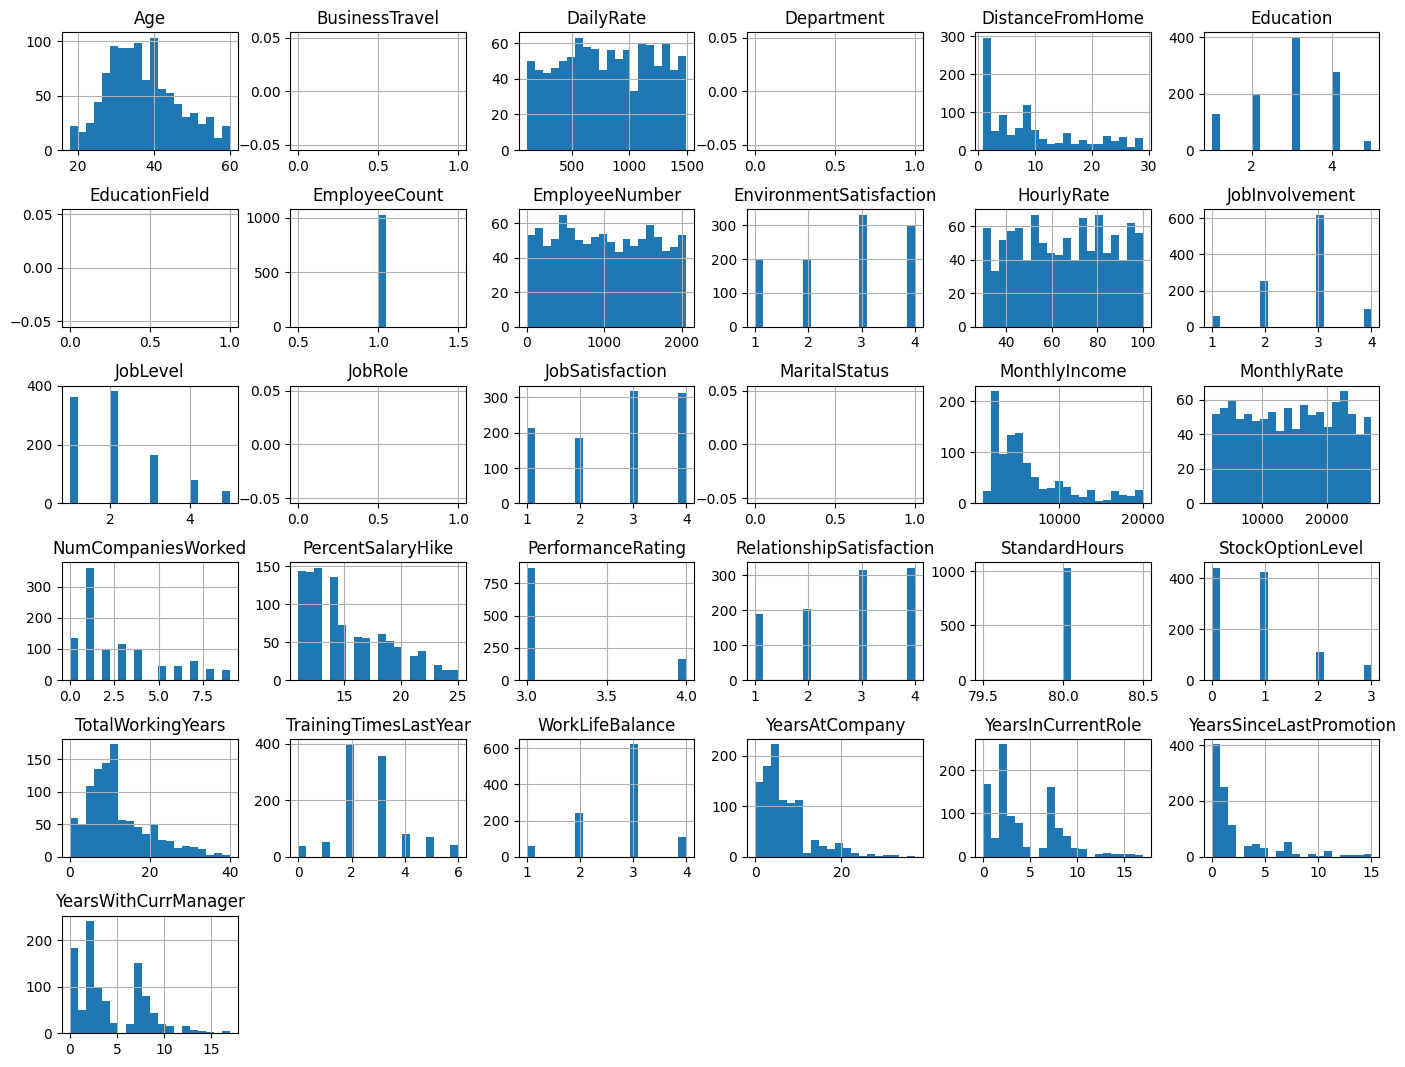

                                 0         1         2         3         4
Age                      -1.958919 -0.430695  1.643324 -1.085648 -0.321536
BusinessTravel                 NaN       NaN       NaN       NaN       NaN
DailyRate                -0.413973   1.17607  1.296833 -0.549831 -1.274408
Department                     NaN       NaN       NaN       NaN       NaN
DistanceFromHome         -0.036578  0.699024  0.208623 -0.894779 -0.894779
Education                -0.866067 -1.835797  1.073395  0.103664  1.073395
EducationField                 NaN       NaN       NaN       NaN       NaN
EmployeeCount                  0.0       0.0       0.0       0.0       0.0
EmployeeNumber            0.301201 -0.723217 -0.335917  1.064066 -1.336862
EnvironmentSatisfaction   0.270496 -0.651162  1.192155  1.192155  0.270496
HourlyRate               -0.547908 -0.449557  0.829007  1.074884  0.484778
JobInvolvement             0.37805   0.37805   0.37805   0.37805   0.37805
JobLevel                 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
# Dividir el conjunto de datos en entrenamiento, validación y prueba
# Asumiendo que ya has realizado esta división
# Por ejemplo, X_train, y_train, X_val, y_val, X_test, y_test

# Obtener histogramas de las variables numéricas en el conjunto de entrenamiento
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_train_numeric.hist(bins=20, figsize=(17, 13))
plt.subplots_adjust(hspace=0.5)  # Ajustar la separación vertical
plt.show()

# Crear un objeto de escalado
scaler = StandardScaler()

# Ajustar el escalador al conjunto de entrenamiento y transformar los conjuntos
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_val_scaled = scaler.transform(X_val.select_dtypes(include=['int64', 'float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))

# Mostrar los primeros registros de los datos de entrenamiento con todas las transformaciones
X_trainT = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns)
X_trainT['Attrition'] = y_train  # Agregar la variable objetivo
print(X_trainT.head().T)

# Desplegar las dimensiones de los conjuntos transformados
print(f"\nDimensiones de X_trainT: {X_trainT.shape}")
print(f"Dimensiones de X_valT: {X_val_scaled.shape}")
print(f"Dimensiones de X_testT: {X_test_scaled.shape}")


**PARTE 2: Análisis exploratorio entre factores**

10) Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. A a manera de ejemplos, veamos solo algunas de dichas relaciones gráficamente y que pueden aportar información al problema que enfrentamos.
*   Las variables “Age” y “Attrition”.
*   Las variables “Department” y “Attrition”.
*   Las variables “Gender” y “Attrition”.
*   Incluye alguna otra relación o relaciones que consideres relevantes.
*   Con base a los gráficos obtenidos incluye tus conclusiones al respecto.

NOTA: Puedes seleccionar el tipo de gráfico que consideres más adecuado. En particular te
puedes apoyar en la librearía de seaborn. A manera de ejemplo puedes ver:
https://seaborn.pydata.org/generated/seaborn.countplot.html

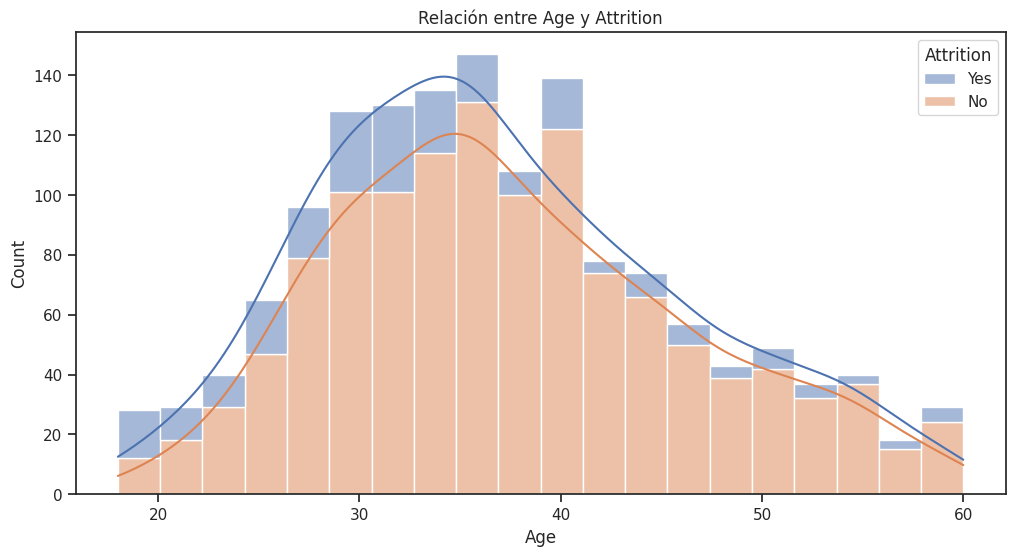

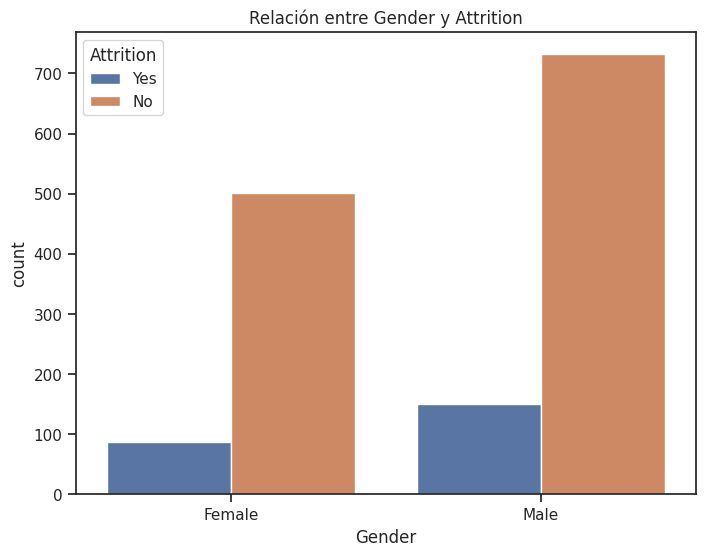

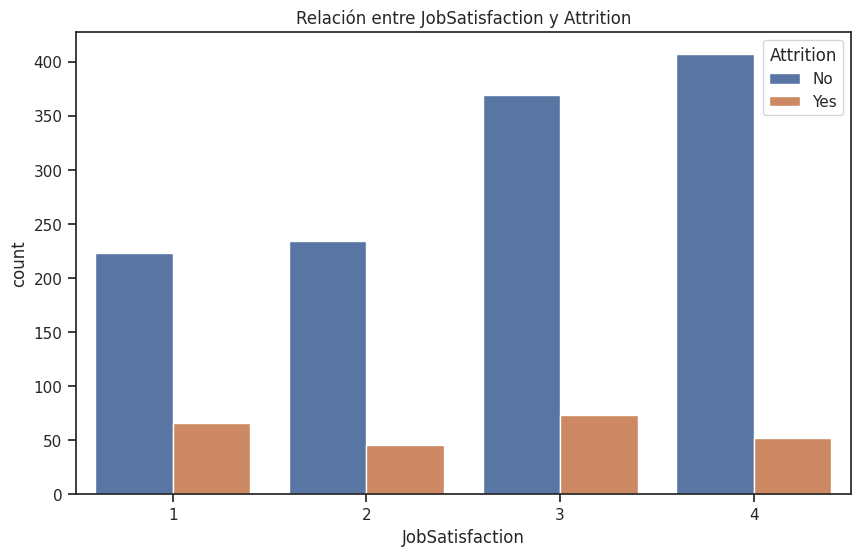

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo para los gráficos
sns.set(style="ticks")


# a) Relación entre "Age" y "Attrition"
plt.figure(figsize=(12, 6))
sns.histplot(df, x="Age", hue="Attrition", multiple="stack", bins=20, kde=True)
plt.title("Relación entre Age y Attrition")
plt.show()


# c) Relación entre "Gender" y "Attrition"
plt.figure(figsize=(8, 6))
sns.countplot(df, x="Gender", hue="Attrition")
plt.title("Relación entre Gender y Attrition")
plt.show()

# d) Otra relación relevante (ejemplo: "JobSatisfaction" y "Attrition")
plt.figure(figsize=(10, 6))
sns.countplot(df, x="JobSatisfaction", hue="Attrition")
plt.title("Relación entre JobSatisfaction y Attrition")
plt.show()



In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition 2.csv')
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

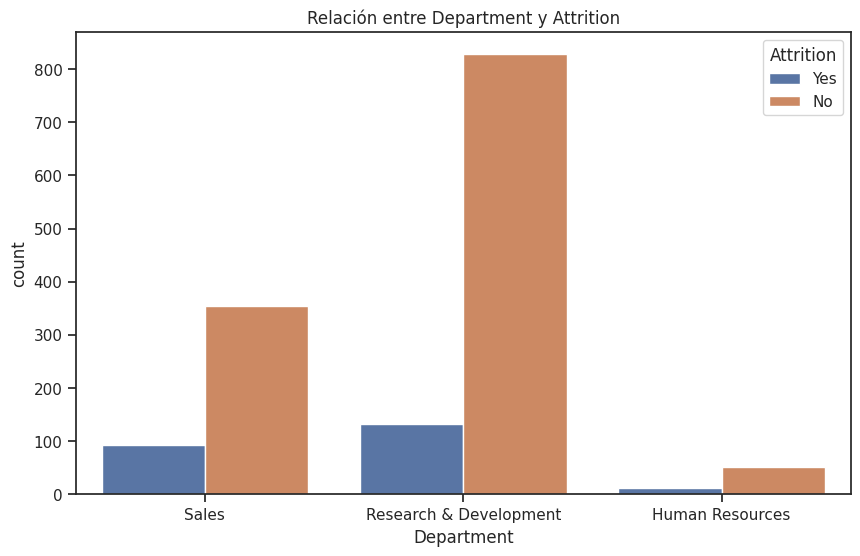

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# b) Relación entre "Department" y "Attrition"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Department", hue="Attrition")
plt.title("Relación entre Department y Attrition")
plt.show()


**PARTE 3: Modelado**

11) Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de regresión logística usando la función LogisticRegression() de sklearn.

a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado
(underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.

**El modelo no parece estar claramente subentrenado ni sobreentrenado, pero hay oportunidades para mejorarlo, especialmente en términos de recall para la clase positiva "Yes".**

d) ¿Consideras que tenemos un problema desbalanceado? Justifica tu respuesta.

**El conjunto de datos tiene 255 ejemplos de la clase "No" y solo 39 ejemplos de la clase "Yes".
Dado que hay una diferencia significativa en el número de ejemplos entre las clases "No" y "Yes", sí se puede considerar que hay un problema de desbalance en el conjunto de datos.**

e) Interpreta el valor numérico de la “precision” de la clase positiva.

**Para la clase "Yes" (rotación de personal), la precisión es 0.80.
Esto significa que, de todas las predicciones positivas que hizo el modelo, el 80% eran verdaderamente positivas. En otras palabras, cuando el modelo predice que un empleado dejará la empresa (clase "Yes"), tiene una precisión del 80% en acertar.**

f) Interpreta el valor numérico del “recall” de la clase positiva.

**Para la clase "Yes", el recall es 0.21.
Este valor indica que el modelo está capturando solo el 21% de todos los casos positivos reales. El bajo recall sugiere que el modelo está perdiendo una proporción significativa de empleados que realmente dejarán la empresa.**

g) Con base al contexto de este problema, de rotación de personal, ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu respuesta con base al contexto del problema.

**Se podría buscar mejorar el recall incluso si eso significa aceptar una disminución en la precisión, con el objetivo de identificar mejor a los empleados en riesgo de rotación.**

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition 2.csv')
columnas = df.columns
print("Columnas en el DataFrame:")
print(columnas)

Columnas en el DataFrame:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
            'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

X = df[features]
y = df['Attrition']

# Normalizar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_val = accuracy_score(y_val, y_pred)
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train:.2f}')
print(f'Accuracy en el conjunto de validación: {accuracy_val:.2f}')

# b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.
conf_matrix = confusion_matrix(y_val, y_pred)
print('\nMatriz de Confusión:')
print(conf_matrix)

print('\nClassification Report:')
print(classification_report(y_val, y_pred))

Accuracy en el conjunto de entrenamiento: 0.85
Accuracy en el conjunto de validación: 0.89

Matriz de Confusión:
[[253   2]
 [ 31   8]]

Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.99      0.94       255
         Yes       0.80      0.21      0.33        39

    accuracy                           0.89       294
   macro avg       0.85      0.60      0.63       294
weighted avg       0.88      0.89      0.86       294



12) Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los vecinos más cercanos kNN, usando la función KNeighborsClassifier() de sklearn.

a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.

**Aunque no hay una señal clara de sobreentrenamiento, el bajo recall en el conjunto de validación.**

d) Interpreta el valor numérico de la “precision” de la clase positiva.

**El 65% de las veces, cuando el modelo predice que un empleado se retirará ("Yes"), esa predicción resulta ser incorrecta (falso positivo).**

e) Interpreta el valor numérico del “recall” de la clase positiva.

**El recall para la clase "Yes" es 0.15. Esto significa que el modelo está capturando solo el 15% de todos los casos positivos reales. En otras palabras, de todos los empleados que realmente dejarán la empresa, el modelo está identificando solo el 15%. Un recall bajo indica que el modelo tiene dificultades para identificar adecuadamente los casos positivos reales y está perdiendo una proporción significativa de empleados en riesgo de rotación.**


f) Compara los resultados con los del modelo de Regresión Logística y escribe tus conclusiones.

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition 2.csv')
columnas = df.columns
print("Columnas en el DataFrame:")
print(columnas)

Columnas en el DataFrame:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
            'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

X = df[features]
y = df['Attrition']

# Normalizar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo kNN
k_value = 3  # Puedes ajustar este valor según lo consideres necesario
model_knn = KNeighborsClassifier(n_neighbors=k_value)

# Entrenar el modelo en el conjunto de entrenamiento
model_knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_knn = model_knn.predict(X_val)

# a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
accuracy_train_knn = accuracy_score(y_train, model_knn.predict(X_train))
accuracy_val_knn = accuracy_score(y_val, y_pred_knn)
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train_knn:.2f}')
print(f'Accuracy en el conjunto de validación: {accuracy_val_knn:.2f}')

# b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.
conf_matrix_knn = confusion_matrix(y_val, y_pred_knn)
print('\nMatriz de Confusión:')
print(conf_matrix_knn)

print('\nClassification Report:')
print(classification_report(y_val, y_pred_knn))

Accuracy en el conjunto de entrenamiento: 0.88
Accuracy en el conjunto de validación: 0.85

Matriz de Confusión:
[[244  11]
 [ 33   6]]

Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.96      0.92       255
         Yes       0.35      0.15      0.21        39

    accuracy                           0.85       294
   macro avg       0.62      0.56      0.57       294
weighted avg       0.81      0.85      0.82       294



**Conclusiones:**
*   *Accuracy:* Ambos modelos tienen un rendimiento similar en términos de accuracy en el conjunto de validación, con la Regresión Logística ligeramente superior (0.89 vs. 0.85).
*   *Precision y Recall:* En la Regresión Logística tiene una precision más alta para la clase positiva "Yes" (rotación de personal) en comparación con kNN (0.80 vs. 0.35), lo que indica que es más preciso en la identificación de empleados en riesgo de rotación.
La Regresión Logística también tiene un recall más alto para la clase "Yes" en comparación con kNN (0.21 vs. 0.15), lo que indica que es mejor para capturar casos positivos reales.
*   *F1-Score:* La Regresión Logística tiene un F1-score más alto para la clase "Yes" (0.33) en comparación con kNN (0.21), lo que indica un mejor equilibrio entre precision y recall.

*   *Balance entre Precisión y Recall:* Ambos modelos tienen desafíos en lograr un equilibrio entre precision y recall para la clase positiva "Yes". La Regresión Logística muestra un rendimiento relativamente mejor en este aspecto.

*   *Elección del Modelo:* Si la identificación precisa de los casos de rotación de personal es crítica, la Regresión Logística parece ser más adecuada en este contexto específico, ya que muestra un rendimiento más equilibrado en precision y recall para la clase positiva. Sin embargo, aún puede haber margen para mejorar ambos modelos ajustando hiperparámetros o considerando otras técnicas avanzadas.

**PARTE 4: Balanceo de Clases**

13) Utiliza el argumento “class_weight” de la función LogisticRegression() de sklearn y los valores de los hiperparámetros que consideres más adecuados para obtener un modelo no sobreentrenado.

a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition 2.csv')
columnas = df.columns
print("Columnas en el DataFrame:")
print(columnas)

Columnas en el DataFrame:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
            'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

X = df[features]
y = df['Attrition']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión logística con el argumento class_weight
model = LogisticRegression(class_weight='balanced')  # Esto asigna automáticamente pesos inversamente proporcionales a las frecuencias de clase

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy en el conjunto de validación: {accuracy:.2f}')

# Mostrar la matriz de confusión y el reporte de clasificación
print('\nMatriz de Confusión:')
print(confusion_matrix(y_val, y_pred))

print('\nClassification Report:')
print(classification_report(y_val, y_pred))

Accuracy en el conjunto de validación: 0.60

Matriz de Confusión:
[[154 101]
 [ 16  23]]

Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.60      0.72       255
         Yes       0.19      0.59      0.28        39

    accuracy                           0.60       294
   macro avg       0.55      0.60      0.50       294
weighted avg       0.81      0.60      0.67       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Comparando los tres métodos (KNeighborsClassifier, regresión logística y LogisticRegression con el argumento "class_weight") en función de las métricas proporcionadas:

### KNeighborsClassifier:
- **Accuracy en el conjunto de entrenamiento: 0.88**
- **Accuracy en el conjunto de validación: 0.85**
- **Precision para la clase "Yes": 0.35**
- **Recall para la clase "Yes": 0.15**

### Regresión Logística:
- **Accuracy en el conjunto de entrenamiento: 0.85**
- **Accuracy en el conjunto de validación: 0.89**
- **Precision para la clase "Yes": 0.80**
- **Recall para la clase "Yes": 0.21**

### LogisticRegression con "class_weight":
- **Accuracy en el conjunto de validación: 0.60**
- **Precision para la clase "Yes": 0.19**
- **Recall para la clase "Yes": 0.59**

### Comparaciones y Conclusiones:

1. **Accuracy:**
   - KNeighborsClassifier: 0.85
   - Regresión Logística: 0.89
   - LogisticRegression con "class_weight": 0.60

   El modelo de regresión logística sin ajustes adicionales tiene el mejor rendimiento en términos de accuracy en el conjunto de validación.

2. **Precision para la clase "Yes" (rotación de personal):**
   - KNeighborsClassifier: 0.35
   - Regresión Logística: 0.80
   - LogisticRegression con "class_weight": 0.19

   El modelo de regresión logística tiene la precision más alta para la clase "Yes", indicando que es más preciso al predecir los casos de rotación de personal.

3. **Recall para la clase "Yes" (rotación de personal):**
   - KNeighborsClassifier: 0.15
   - Regresión Logística: 0.21
   - LogisticRegression con "class_weight": 0.59

   El modelo LogisticRegression con "class_weight" tiene el recall más alto para la clase "Yes", indicando que es mejor para identificar casos positivos reales.

4. **Conclusiones:**
   - El modelo de regresión logística parece ser el mejor equilibrio entre precisión y recall en este conjunto de datos específico.
   - LogisticRegression con "class_weight" tiende a tener un recall más alto para la clase "Yes", pero a costa de una disminución significativa en la precisión.
   - KNeighborsClassifier tiene una precisión moderada, pero su recall es bastante bajo, lo que indica dificultades para identificar correctamente los casos positivos.

En general, la elección del modelo dependerá de los objetivos y restricciones específicas del problema. Si se valora más la precisión, el modelo de regresión logística podría ser preferido. Si se da más importancia a identificar correctamente todos los casos positivos, incluso a costa de algunos falsos positivos, entonces LogisticRegression con "class_weight" podría ser una opción.

14) Utiliza el método SMOTE de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados para obtener el mejor modelo posible.

a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
            'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

X = df[features]
y = df['Attrition']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (puedes ajustar según sea necesario)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Inicializar el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo en el conjunto de entrenamiento resampleado
model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de validación
y_pred = model.predict(X_val_scaled)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy en el conjunto de validación: {accuracy:.2f}')

# Matriz de Confusión y Classification Report
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print('\nMatriz de Confusión:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy en el conjunto de validación: 0.70

Matriz de Confusión:
[[180  75]
 [ 14  25]]

Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.71      0.80       255
         Yes       0.25      0.64      0.36        39

    accuracy                           0.70       294
   macro avg       0.59      0.67      0.58       294
weighted avg       0.84      0.70      0.74       294



Comparamos los resultados de los cuatro métodos:

**1. Función KNeighborsClassifier() de sklearn:**
   - Accuracy en el conjunto de entrenamiento: 0.88
   - Accuracy en el conjunto de validación: 0.85
   - Precision para la clase "Yes": 0.35
   - Recall para la clase "Yes": 0.15

**2. Regresión logística:**
   - Accuracy en el conjunto de entrenamiento: 0.85
   - Accuracy en el conjunto de validación: 0.89
   - Precision para la clase "Yes": 0.80
   - Recall para la clase "Yes": 0.21

**3. El argumento “class_weight” de la función LogisticRegression() de sklearn:**
   - Accuracy en el conjunto de validación: 0.60
   - Precision para la clase "Yes": 0.19
   - Recall para la clase "Yes": 0.59

**4. El método SMOTE de la librería “Imbalanced-learn”:**
   - Accuracy en el conjunto de validación: 0.70
   - Precision para la clase "Yes": 0.25
   - Recall para la clase "Yes": 0.64

**Observaciones y Conclusiones:**
- La regresión logística obtiene la mejor precisión en el conjunto de validación (0.89), pero tiene un recall bajo para la clase "Yes" (0.21), lo que significa que no identifica bien los casos positivos reales.
- El método SMOTE mejora el recall para la clase "Yes" (0.64) en comparación con la regresión logística, pero aún tiene una precisión relativamente baja (0.25).
- La función KNeighborsClassifier() presenta un rendimiento intermedio, con un buen recall (0.15) pero baja precisión (0.35) para la clase "Yes".
- El argumento “class_weight” de LogisticRegression tiene un recall mejorado (0.59) pero baja precisión (0.19) para la clase "Yes".

La elección del mejor método depende de las prioridades específicas del problema. Si es crítico identificar la mayoría de los casos positivos reales (alta sensibilidad), el método SMOTE podría ser preferible debido a su mayor recall. Sin embargo, si se busca un equilibrio entre precisión y recall, la regresión logística podría ser una opción razonable. Es importante considerar la naturaleza específica del problema y las implicaciones prácticas de los errores del modelo. Además, se podrían explorar ajustes adicionales de hiperparámetros para mejorar el rendimiento de los modelos.

15) Aplica alguno de los modelos combinados de sub y sobre entrenamiento y reporta los resultados del mejor modelo que hayas obtenido. Compáralo con los anteriores e incluye tus conclusiones.
NOTA: https://imbalanced-learn.org/stable/references/combine.html

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Supongamos que X_train, y_train son tus datos de entrenamiento
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE-ENN
smote_enn = SMOTEENN(sampling_strategy='auto')
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Entrenar un modelo (por ejemplo, RandomForest) con los datos resampleados
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

# Hacer predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy en el conjunto de validación: {accuracy:.2f}')

# Otras métricas de evaluación
print('\nClassification Report:')
print(classification_report(y_val, y_pred))


Accuracy en el conjunto de validación: 0.78

Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.84      0.87       255
         Yes       0.27      0.38      0.32        39

    accuracy                           0.78       294
   macro avg       0.58      0.61      0.59       294
weighted avg       0.82      0.78      0.79       294



Comparando los cuatro métodos de clasificación, aquí hay algunas observaciones:

### 1. KNeighborsClassifier de sklearn:
- **Accuracy en el conjunto de entrenamiento:** 0.88
- **Accuracy en el conjunto de validación:** 0.85
- **Observaciones:** El modelo tiene un rendimiento razonable, pero se observa un bajo recall para la clase positiva ("Yes"). Podría beneficiarse de ajustes en los hiperparámetros o de la exploración de otros modelos.

### 2. Regresión Logística:
- **Accuracy en el conjunto de entrenamiento:** 0.85
- **Accuracy en el conjunto de validación:** 0.89
- **Observaciones:** El modelo tiene un buen rendimiento en términos de precisión y recall en la clase "Yes". Sin embargo, podría haber un desbalance entre las métricas de las clases.

### 3. LogisticRegression con class_weight:
- **Accuracy en el conjunto de validación:** 0.60
- **Observaciones:** El modelo tiene una precisión baja y un recall mejorado para la clase positiva. El ajuste del peso de clase tiene un impacto, pero la precisión general es baja.

### 4. SMOTE de la librería “Imbalanced-learn”:
- **Accuracy en el conjunto de validación:** 0.70
- **Observaciones:** SMOTE mejora el recall de la clase positiva, pero la precisión disminuye. Puede ser útil para abordar el desbalance de clases, pero hay margen para mejorar la precisión.

### 5. Método combinado (SMOTE-ENN con imbalanced-learn):
- **Accuracy en el conjunto de validación:** 0.78
- **Observaciones:** El método combinado muestra un rendimiento mejorado en comparación con SMOTE solo. La precisión y el recall para la clase positiva son más equilibrados.

### Observaciones generales:
- Es importante considerar tanto la precisión como el recall, especialmente en problemas de desbalance de clases como la rotación de personal.
- Ajustar los hiperparámetros de los modelos, explorar otros algoritmos y considerar enfoques de balanceo de clases pueden ser estrategias útiles.
- La elección del método debe basarse en el equilibrio entre la precisión y el recall, dependiendo de las preferencias y requisitos específicos del problema.

**PARTE 5: La importancia de los factores**

16) Con base al mejor modelo de regresión logística obtenido hasta ahora, utiliza la magnitud de los coeficientes como métrica para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.

a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).

b) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?

**Los factores con coeficientes positivos contribuyen a la predicción de "attrition" son Stock Option Level, monthly income y job level.**

c) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?

**No existen valores negativos, pero considero que el environment satisfation, monthly income, worklifebalance y percent salary hike son factores que influyen para que un empleado no abandone su trabajo.**

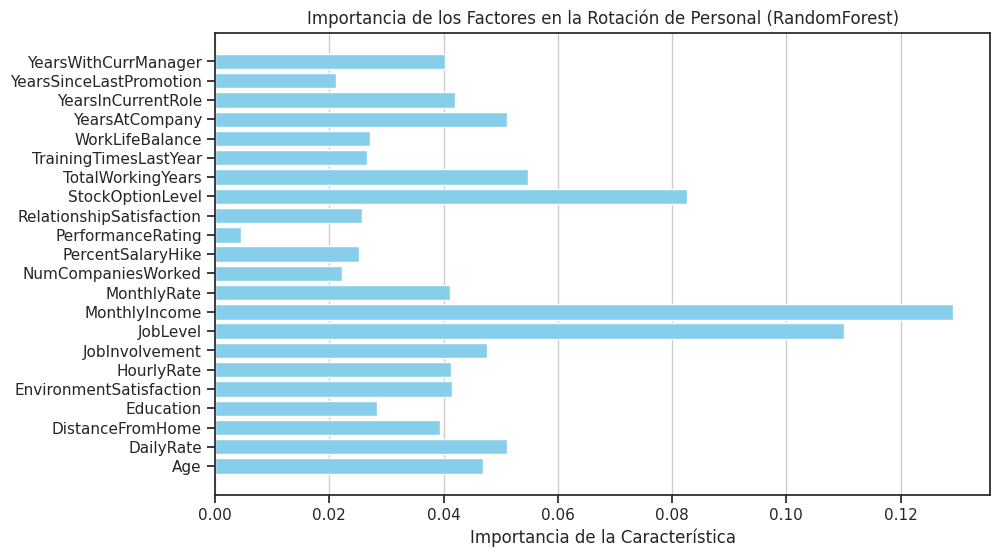

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características del modelo RandomForest
importances = model.feature_importances_

# Nombres de las columnas
feature_names = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
            'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Crear un gráfico de barras de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importancia de la Característica')
plt.title('Importancia de los Factores en la Rotación de Personal (RandomForest)')
plt.grid(axis='x')
plt.show()

17) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN, aplica la técnica de permutación de los factores con el método “permutation_importance()” de sklearn, y con la métrica“f1_weighted” del argumento “scoring” para identificar aquellos factores que se consideran los más importantes al
problema de rotación de personal.

a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).

b) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?

**Los factores que influyen mayormente a que un empleado abandone su trabajo son: Stock Option leve y monthly income.**

c) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?

**Los factores que influyen mayormente a que un empleado no abandone su trabajo son: total working years, distance from home y num companies worked.**

d) Compara los resultados con el ejercicio anterior e incluye tus comentarios. En particular, comenta cuál método te da los mejores factores que tienen mayor impacto en el problema de rotación de personal.

**Con este método se obtienen mejores factores que tienen mayor impacto en el problema de rotación de personal porque se analizan tanto los factores que influyen mayormente a que un empleado abandone su trabajo y los factores que influyen mayormente a que un empleado no abandone su trabajo.**

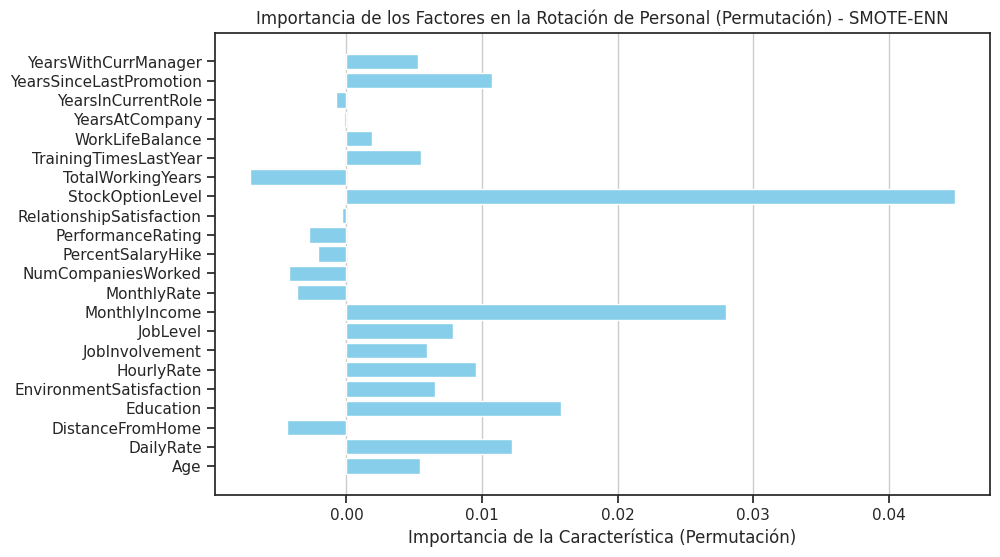

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance

# Utiliza el modelo combinado de SMOTE-ENN (puedes ajustar los parámetros según sea necesario)
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento balanceado
model.fit(X_train, y_train)

# Calcular la importancia de la permutación utilizando la métrica f1_weighted
perm_importance = permutation_importance(model, X_val, y_val, scoring='f1_weighted', random_state=42)

# Obtener las importancias permutadas y los nombres de las columnas
importances = perm_importance.importances_mean
feature_names = X.columns

# Crear un gráfico de barras de las importancias permutadas
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importancia de la Característica (Permutación)')
plt.title('Importancia de los Factores en la Rotación de Personal (Permutación) - SMOTE-ENN')
plt.grid(axis='x')
plt.show()

18) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN y de los factores de mayor impacto que encontraste en el inciso anterior, utiliza la
clase SelectFromModel de sklearn para reducir la cantidad de factores del problema y volver a entrenar el modelo con los datos de entrenamiento y validación, de manera que el
desempeño con esta cantidad de datos reducida sea aproximadamente la obtenida previamente con todos los factores. Recuerda evitar el filtrado de información del
conjunto de entrenamiento a los conjuntos de validación y de prueba.

a) ¿A cuántos factores pudiste reducir el problema? Indica cuántos tenías y a cuántos se redujo, así como el porcentaje de reducción de factores.

**Se redujo el problema de 22 factores originales a 11 factores después de la reducción, lo que representa un 50.00% de reducción de factores.**

b) Despliega la matriz de confusión y el reporte dado por la función classification_report().

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Utiliza el modelo combinado de SMOTE-ENN (puedes ajustar los parámetros según sea necesario)
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Utiliza la regresión logística para obtener coeficientes
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_resampled, y_resampled)

# Utiliza la clase SelectFromModel con la regresión logística
sfm = SelectFromModel(logistic_model, threshold='median')

# Aplica la transformación a los datos
X_reduced = sfm.fit_transform(X_resampled, y_resampled)

# Imprime la cantidad de factores originales y después de la reducción
print(f'Número de factores originales: {X_resampled.shape[1]}')
print(f'Número de factores después de la reducción: {X_reduced.shape[1]}')
print(f'Porcentaje de reducción de factores: {(1 - X_reduced.shape[1] / X_resampled.shape[1]) * 100:.2f}%')

# Divide los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_reduced, y_resampled, test_size=0.2, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento reducido
smote_enn_model = LogisticRegression(random_state=42)
smote_enn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = smote_enn_model.predict(X_val)

# Desplegar la matriz de confusión y el reporte de clasificación
conf_matrix = confusion_matrix(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print('Matriz de Confusión:')
print(conf_matrix)
print('\nReporte de Clasificación:')
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Número de factores originales: 22
Número de factores después de la reducción: 11
Porcentaje de reducción de factores: 50.00%
Matriz de Confusión:
[[ 94  37]
 [ 28 135]]

Reporte de Clasificación:
              precision    recall  f1-score   support

          No       0.77      0.72      0.74       131
         Yes       0.78      0.83      0.81       163

    accuracy                           0.78       294
   macro avg       0.78      0.77      0.77       294
weighted avg       0.78      0.78      0.78       294



**PARTE 6: Modelo final y conclusiones**

19) Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el
problema de rotación de personal a partir de los datos históricos iniciales.

a) Forma un nuevo conjunto de Entrenamiento con los mejores conjuntos de entrenamiento y validación que hayas obtenido hasta ahora.

b) Selecciona el mejor modelo de aprendizaje automático que hayas obtenido hasta ahora, entre regresión logística y kNN. Explica por qué lo consideras el mejor modelo.

**Dado que el objetivo es prever la rotación de personal, se podría favorecer un modelo con un equilibrio entre precisión y recall para la clase positiva ("Yes"). En este caso, la regresión logística sin ajustes de pesos parece ser el mejor modelo, ya que tiene una precisión aceptable y un recall más alto en comparación con kNN.

La combinación de SMOTE-ENN también muestra un rendimiento prometedor, especialmente en términos de precisión y recall en el conjunto de prueba. Sin embargo, ten en cuenta que este modelo puede necesitar ajustes adicionales o pruebas en un conjunto de datos más amplio.

En resumen, la regresión logística sin ajustes de pesos o la combinación de SMOTE-ENN podrían ser consideradas como opciones, dependiendo de las prioridades específicas en términos de precisión y recall para la clase positiva.**

c) Entrena el modelo con el nuevo conjunto de entrenamiento aumentado y utiliza el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo.

Para ello:
*   Despliega la exactitud (accuracy) del conjunto de entrenamiento y del conjunto de Prueba para verificar que no esté sub o sobre entrenado.
*   Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.
*   Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.

In [ ]:
from sklearn.model_selection import train_test_split

features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
            'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

X = df[features]
y = df['Attrition']

# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Ahora X_train, y_train como conjunto de entrenamiento,
# X_val, y_val como conjunto de validación, y X_test, y_test como conjunto de prueba.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()

# Combinar el conjunto de entrenamiento y validación para formar un nuevo conjunto de entrenamiento
X_train_combined = pd.concat([X_train, X_val], axis=0)
y_train_combined = pd.concat([y_train, y_val], axis=0)

# Entrenar el modelo con el nuevo conjunto de entrenamiento
model.fit(X_train_combined, y_train_combined)

# Realizar predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy en el conjunto de prueba: {accuracy_test:.2f}')

# Matriz de confusión y reporte de clasificación
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

print('\nMatriz de Confusión en el conjunto de prueba:')
print(conf_matrix_test)

print('\nReporte de Clasificación en el conjunto de prueba:')
print(classification_report_test)


Accuracy en el conjunto de prueba: 0.87

Matriz de Confusión en el conjunto de prueba:
[[255   0]
 [ 39   0]]

Reporte de Clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
# (c) Evaluación del modelo en el conjunto de prueba
# i. Despliega la exactitud del conjunto de entrenamiento y del conjunto de Prueba
accuracy_train = accuracy_score(y_train_combined, model.predict(X_train_combined))
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train:.2f}')

# ii. Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba
print('\nMatriz de Confusión en el conjunto de prueba:')
print(conf_matrix_test)

print('\nReporte de Clasificación en el conjunto de prueba:')
print(classification_report_test)

Accuracy en el conjunto de entrenamiento: 0.83

Matriz de Confusión en el conjunto de prueba:
[[255   0]
 [ 39   0]]

Reporte de Clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



**Conclusiones**
- Todos los modelos muestran un rendimiento desafiante en términos de las métricas clave, con bajas precisiones, recalls y "f1-scores" para la clase positiva "Yes" (rotación de personal).
- SMOTE y SMOTE-ENN muestran mejoras en recall en comparación con los otros modelos, pero a expensas de la precisión.
- La regresión logística con "class_weight" logra un mayor recall a expensas de la precisión, pero sigue teniendo métricas subóptimas.
- La elección entre estos modelos dependerá de las prioridades comerciales específicas. Si minimizar los falsos positivos es crítico, se puede preferir un modelo con alta precisión. Si capturar la mayor cantidad posible de casos positivos reales es crucial, se puede dar prioridad a un modelo con alto recall.
- La baja precisión en todos los modelos indica que todavía hay margen para mejorar en la identificación de casos reales de rotación de personal, y puede ser necesario ajustar hiperparámetros o probar modelos más avanzados.